In [1]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\jebby\Documents\CourseWork\project team\interactions\interactions\1\1\combined_1.csv"

# Read the CSV file
try:
    data = pd.read_csv(file_path)
    # Print the first few rows of the dataset
    print(data.head())
except FileNotFoundError:
    print(f"The file at {file_path} was not found. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")


   site_id  account_nbr  customer_key           start_time  \
0      541     98139413     108286818  2024-09-01 01:12:17   
1      436    154928502      55541673  2024-09-01 01:34:49   
2      436            0            -2  2024-09-01 01:49:29   
3      342     95410112     113459607  2024-09-01 05:39:14   
4      476    110854706     118878574  2024-09-01 06:39:30   

              end_time                                     transaction_id  \
0  2024-09-01 01:16:12  1_10004029941725153123_47408D03CDEBFEDFA4777DA...   
1  2024-09-01 01:36:56  1_10004034001725154478_B23377080185E9F74839524...   
2  2024-09-01 01:52:18  1_10004036701725155339_3D9A2C7862B42A763EBC9C1...   
3  2024-09-01 05:45:30  1_10004062341725169143_5749620C284795BABC14A3D...   
4  2024-09-01 06:42:30  1_10004065271725172760_CD5A21981C2F6AFEE8ED1D5...   

  category product lob  source_id_num  ... dtl_3_char  dtl_4_num dtl_4_char  \
0       AS       U   R            NaN  ...         EN          0     HangUp   
1     

In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7959938 entries, 0 to 7959937
Data columns (total 26 columns):
 #   Column                Dtype  
---  ------                -----  
 0   site_id               int64  
 1   account_nbr           int64  
 2   customer_key          int64  
 3   start_time            object 
 4   end_time              object 
 5   transaction_id        object 
 6   category              object 
 7   product               object 
 8   lob                   object 
 9   source_id_num         float64
 10  source_id_char        object 
 11  dtl_1_num             int64  
 12  dtl_1_char            object 
 13  dtl_2_num             int64  
 14  dtl_2_char            object 
 15  dtl_3_num             int64  
 16  dtl_3_char            object 
 17  dtl_4_num             int64  
 18  dtl_4_char            object 
 19  dtl_5_num             float64
 20  dtl_5_char            float64
 21  dtl_6_num             float64
 22  dtl_6_char            float64
 23  last_up

### Aggregating the data by number of record for every 4 hours

In [3]:
# Assuming 'data' is your DataFrame
# Convert 'start_time' to datetime if not already done
data['start_time'] = pd.to_datetime(data['start_time'], errors='coerce')

# Extract the 4-hour interval from 'start_time'
data['four_hour_interval'] = data['start_time'].dt.floor('4H')

# Group by 'four_hour_interval' and 'site_id' and count the number of records
four_hourly_data = data.groupby(['four_hour_interval', 'site_id']).size().reset_index(name='record_count')

# Ensure the data is sorted by 'site_id' and 'four_hour_interval'
four_hourly_data = four_hourly_data.sort_values(by=['site_id', 'four_hour_interval'])

# Display the first few rows of the grouped data
print(four_hourly_data.head(100))


      four_hour_interval  site_id  record_count
0    2024-09-01 00:00:00       -2             1
346  2024-09-03 16:00:00       -2             1
2713 2024-09-21 20:00:00       -2             2
4214 2024-10-03 08:00:00       -2             3
5912 2024-10-16 08:00:00       -2             1
...                  ...      ...           ...
1174 2024-09-10 00:00:00        1           191
1196 2024-09-10 04:00:00        1            51
1218 2024-09-10 08:00:00        1            42
1239 2024-09-10 12:00:00        1           432
1261 2024-09-10 16:00:00        1           528

[100 rows x 3 columns]


### Rolling sum over 6 periods. gives the total number of calls over the last 24h

In [4]:
# Filter data for site_id == 541
site_hourly_data = four_hourly_data[four_hourly_data['site_id'] == 239]

# Ensure the data is sorted by 'hour'
site_hourly_data = site_hourly_data.sort_values(by='four_hour_interval')

# Calculate the rolling sum
site_hourly_data['rolling'] = site_hourly_data['record_count'].rolling(window=6, min_periods=1).sum()

# Display the result
print(site_hourly_data.head(100))


      four_hour_interval  site_id  record_count  rolling
12   2024-09-01 00:00:00      239           130    130.0
34   2024-09-01 04:00:00      239            17    147.0
55   2024-09-01 08:00:00      239            25    172.0
77   2024-09-01 12:00:00      239           125    297.0
99   2024-09-01 16:00:00      239           134    431.0
...                  ...      ...           ...      ...
2073 2024-09-16 20:00:00      239           197    937.0
2095 2024-09-17 00:00:00      239            63    930.0
2117 2024-09-17 04:00:00      239            15    940.0
2139 2024-09-17 08:00:00      239            31    936.0
2160 2024-09-17 12:00:00      239           271    884.0

[100 rows x 4 columns]


### Plot data for the speicific site

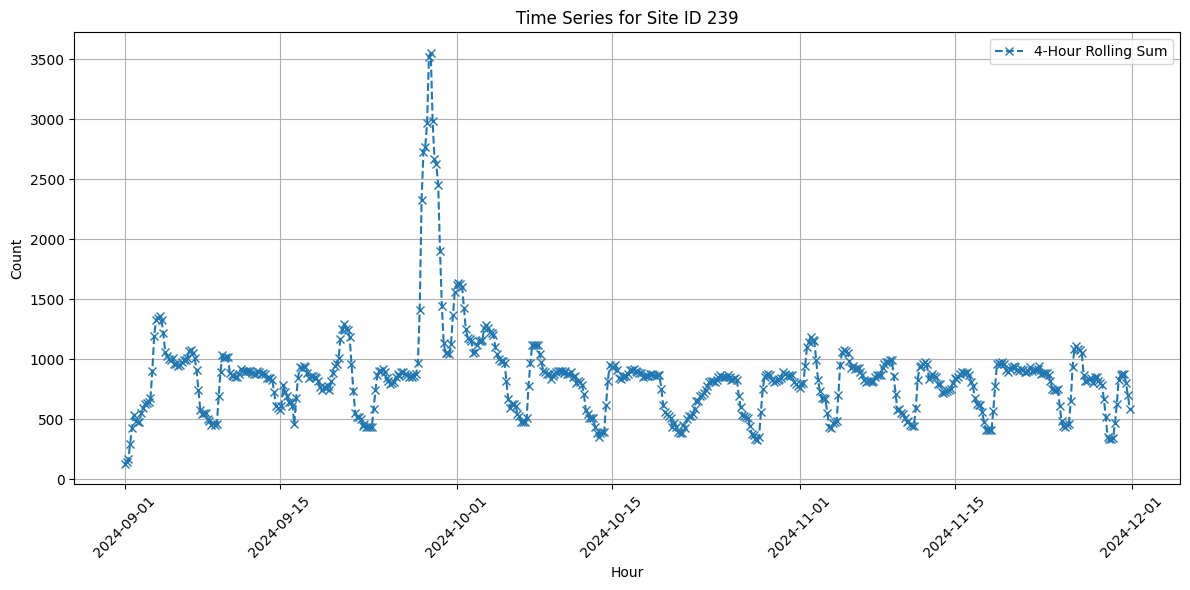

In [5]:
import matplotlib.pyplot as plt

# Plot the time series for record_count and rolling sum
plt.figure(figsize=(12, 6))

# # Plot record_count
# plt.plot(site_hourly_data['hour'], site_hourly_data['record_count'], label='Record Count', marker='o')

# Plot rolling sum
plt.plot(site_hourly_data['four_hour_interval'], site_hourly_data['rolling'], label='4-Hour Rolling Sum', linestyle='--', marker='x')

# Customize the plot
plt.title(f"Time Series for Site ID {site_hourly_data['site_id'].iloc[0]}")
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()


   site_id  account_nbr  customer_key           start_time  \
0      541     98139413     108286818  2024-09-01 01:12:17   
1      436    154928502      55541673  2024-09-01 01:34:49   
2      436            0            -2  2024-09-01 01:49:29   
3      342     95410112     113459607  2024-09-01 05:39:14   
4      476    110854706     118878574  2024-09-01 06:39:30   

              end_time                                     transaction_id  \
0  2024-09-01 01:16:12  1_10004029941725153123_47408D03CDEBFEDFA4777DA...   
1  2024-09-01 01:36:56  1_10004034001725154478_B23377080185E9F74839524...   
2  2024-09-01 01:52:18  1_10004036701725155339_3D9A2C7862B42A763EBC9C1...   
3  2024-09-01 05:45:30  1_10004062341725169143_5749620C284795BABC14A3D...   
4  2024-09-01 06:42:30  1_10004065271725172760_CD5A21981C2F6AFEE8ED1D5...   

  category product lob  source_id_num  ... dtl_3_char  dtl_4_num dtl_4_char  \
0       AS       U   R            NaN  ...         EN          0     HangUp   
1     

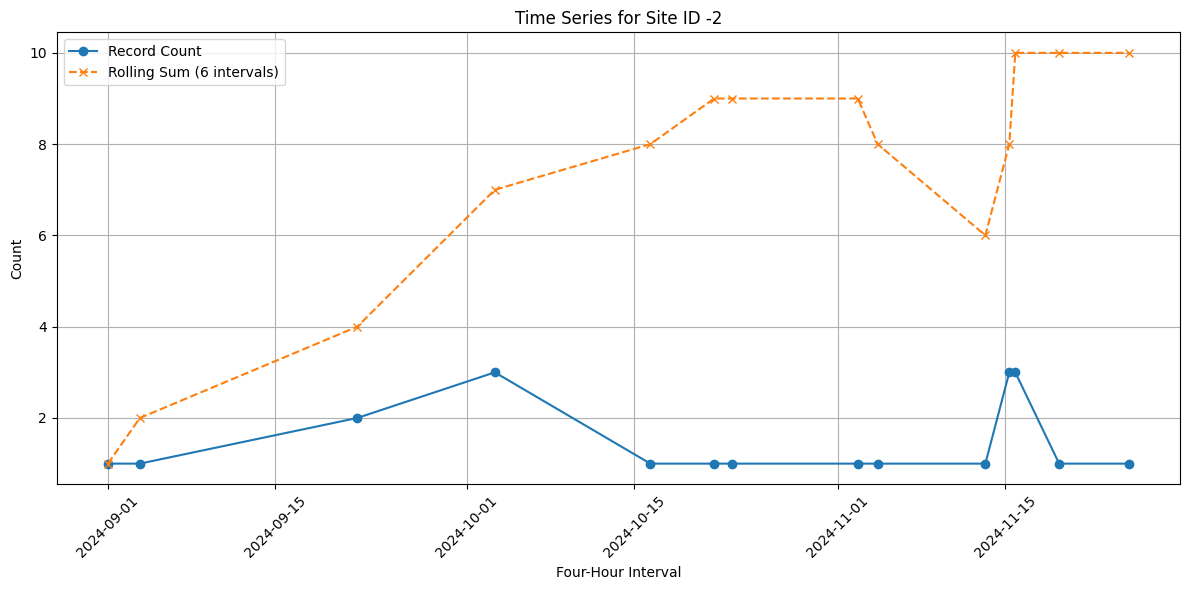

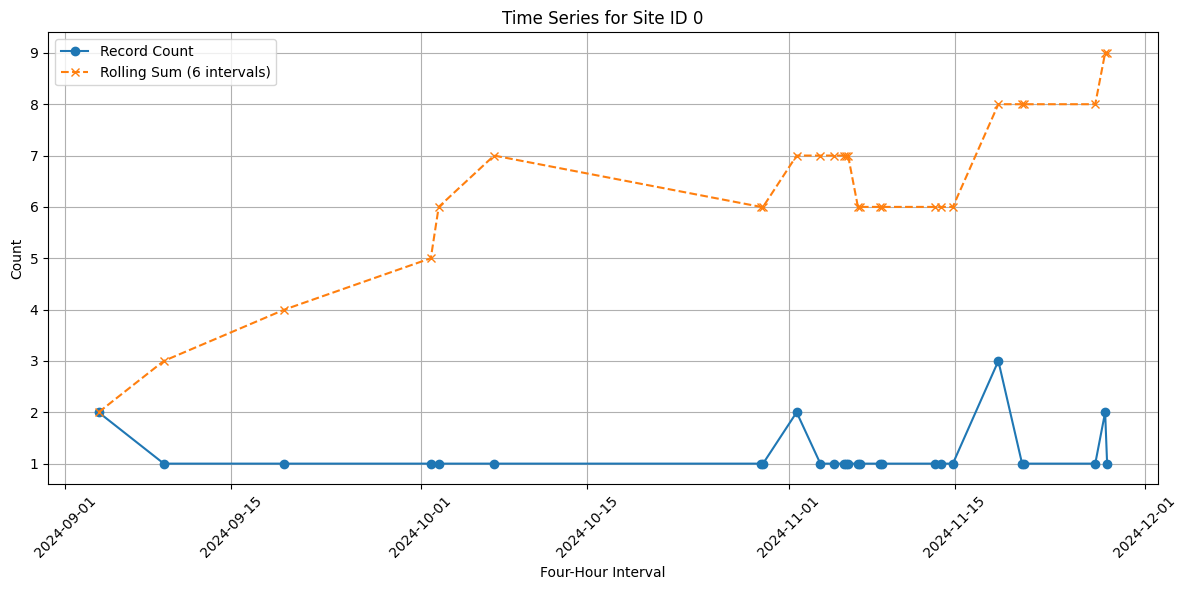

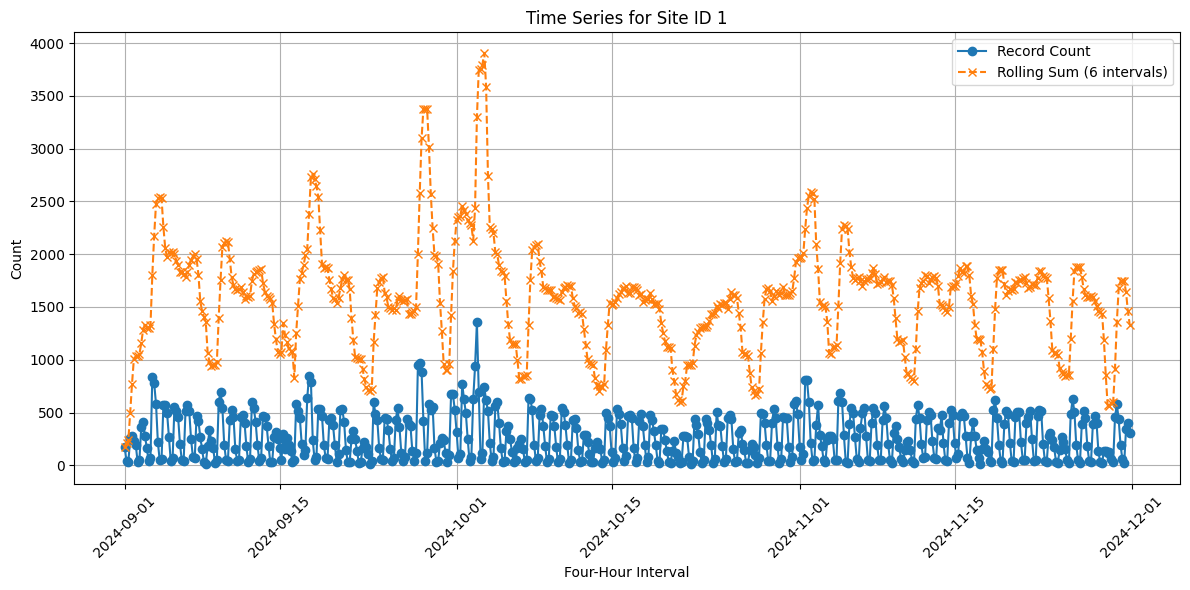

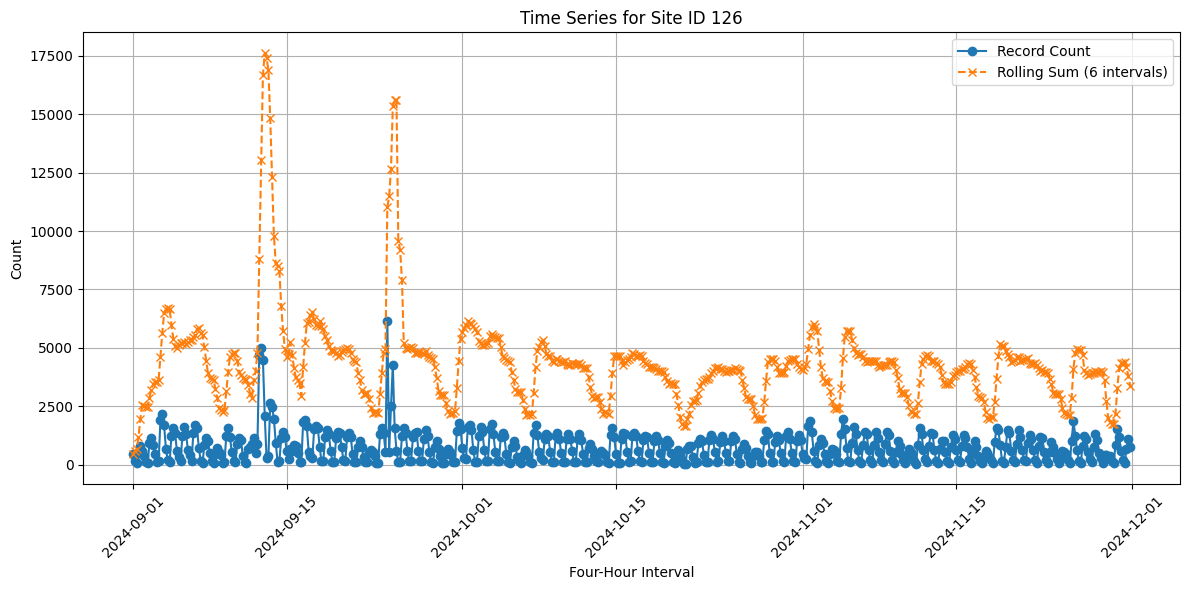

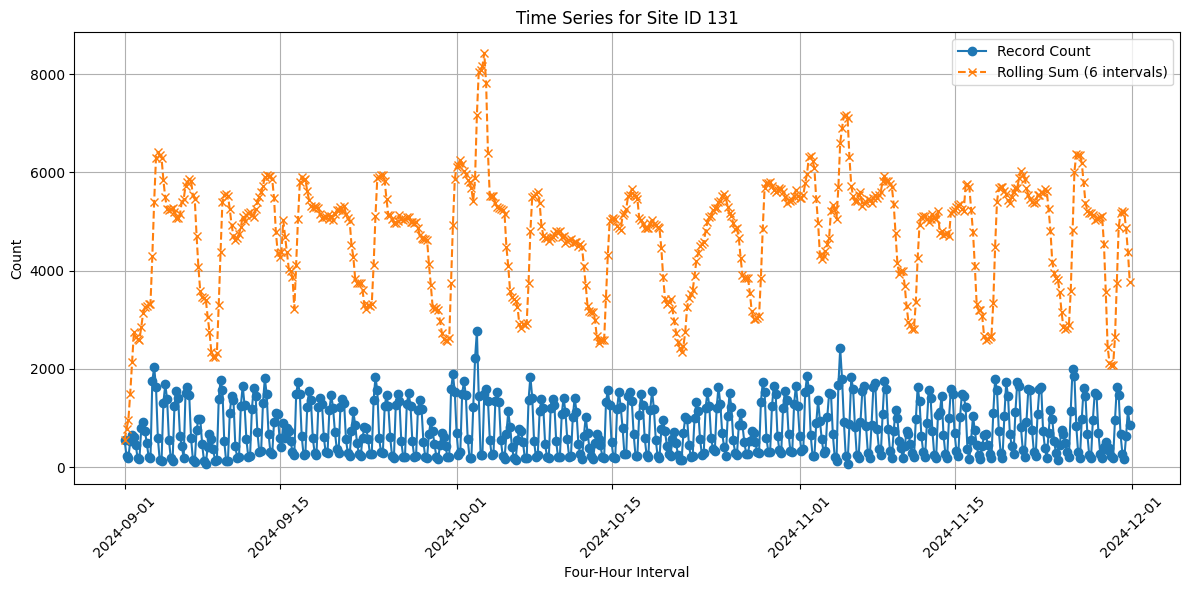

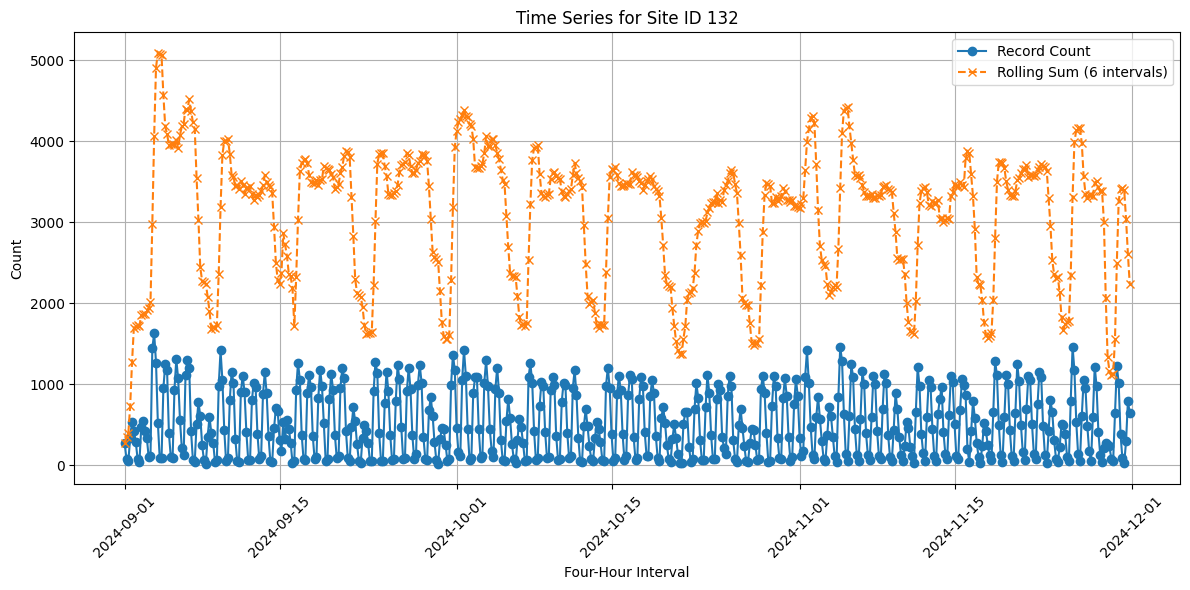

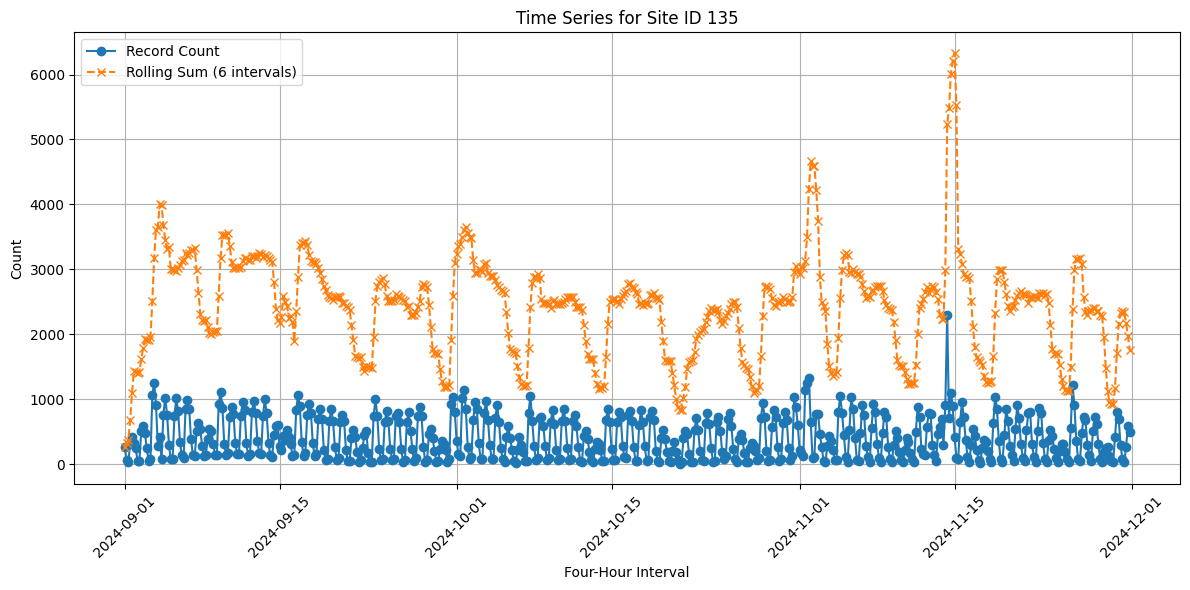

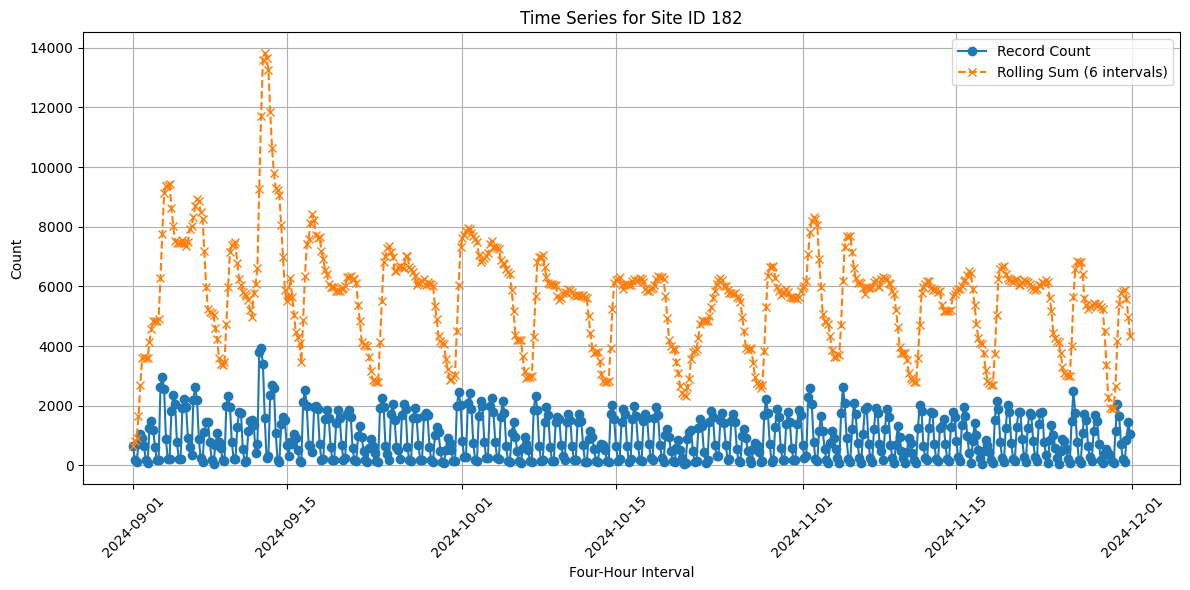

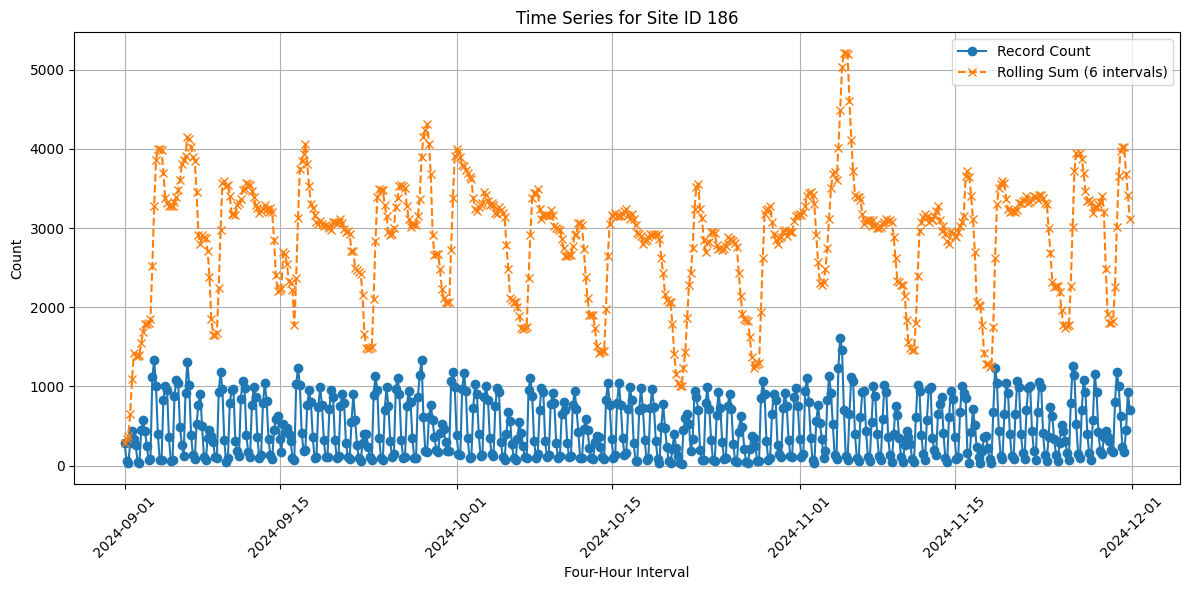

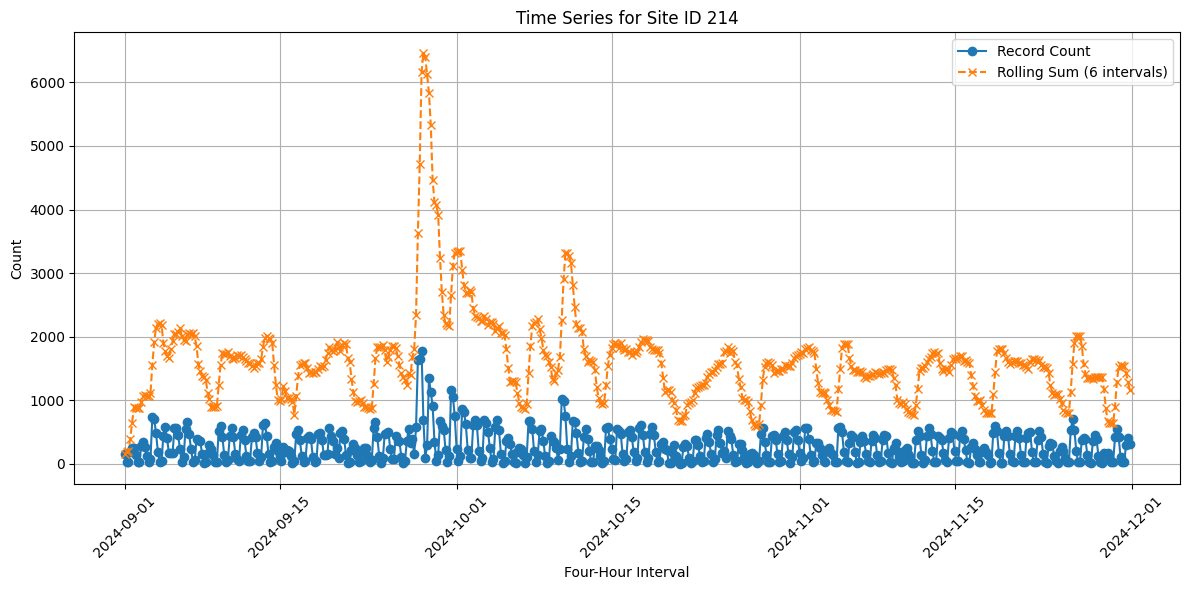

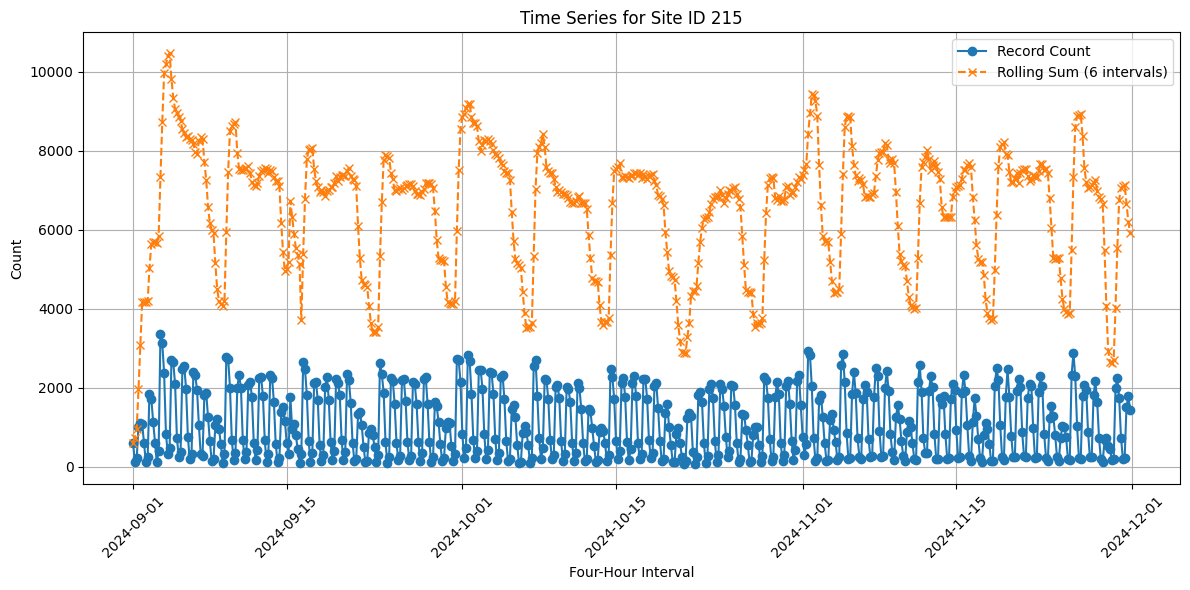

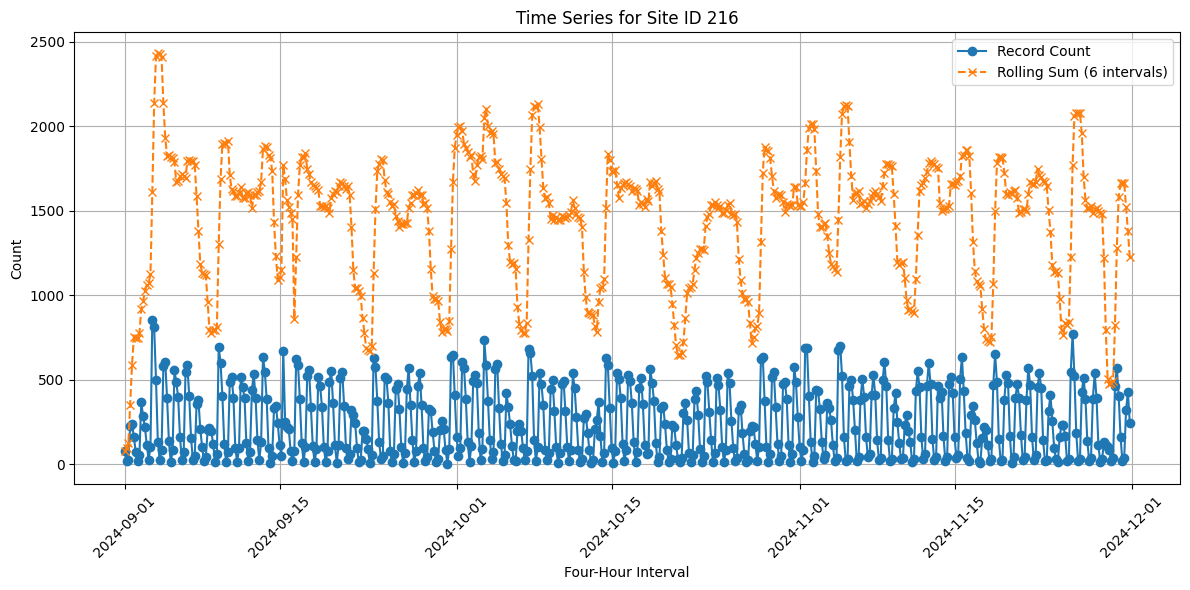

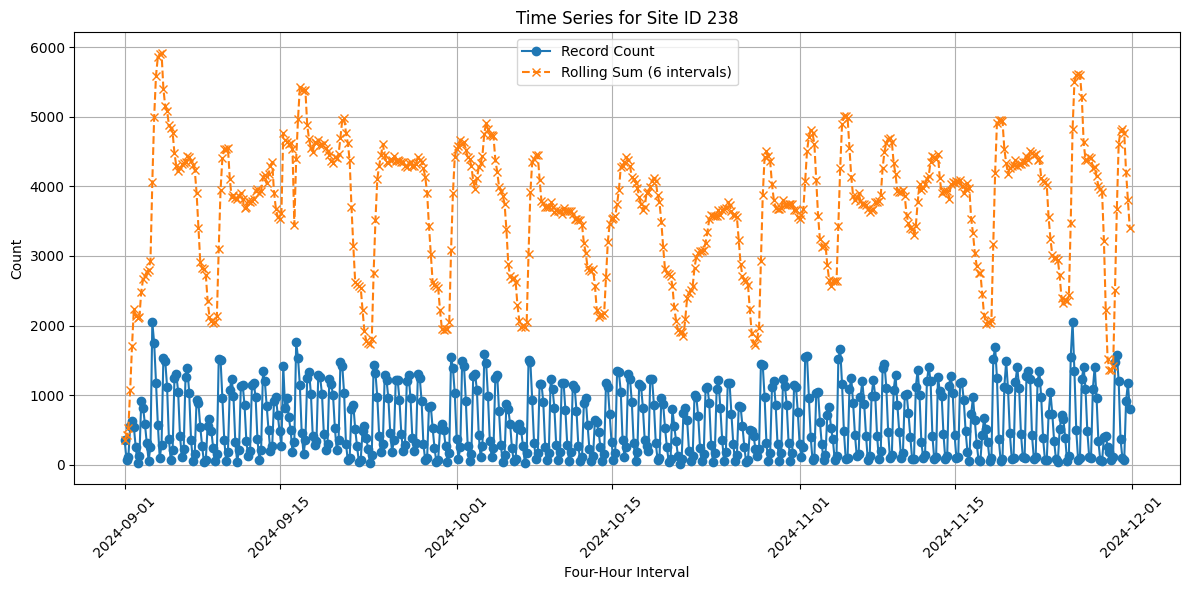

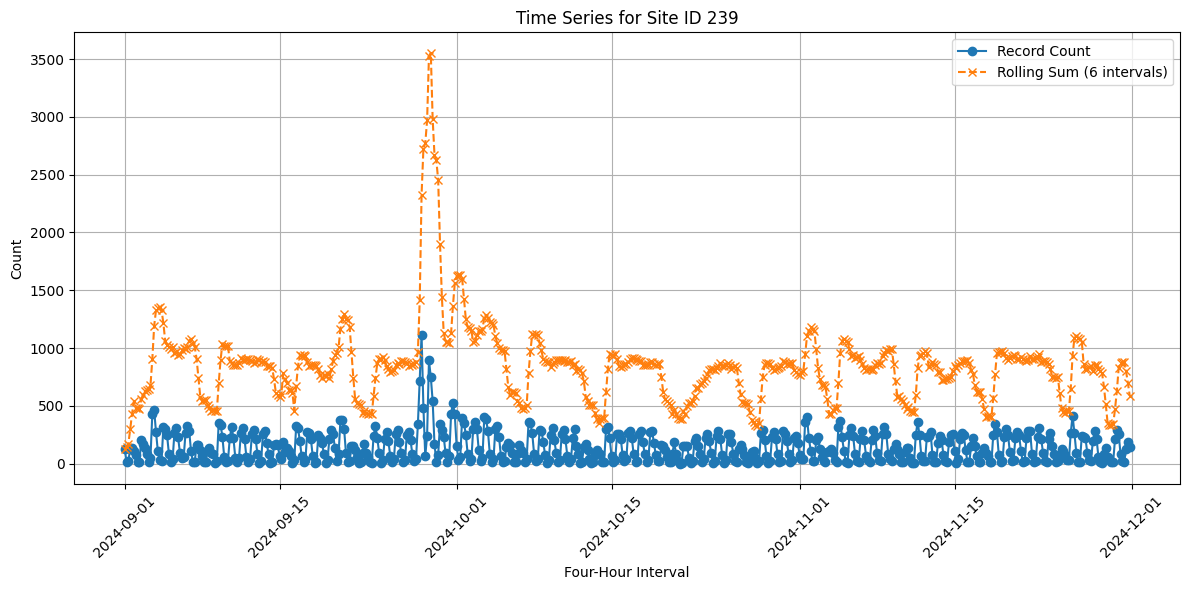

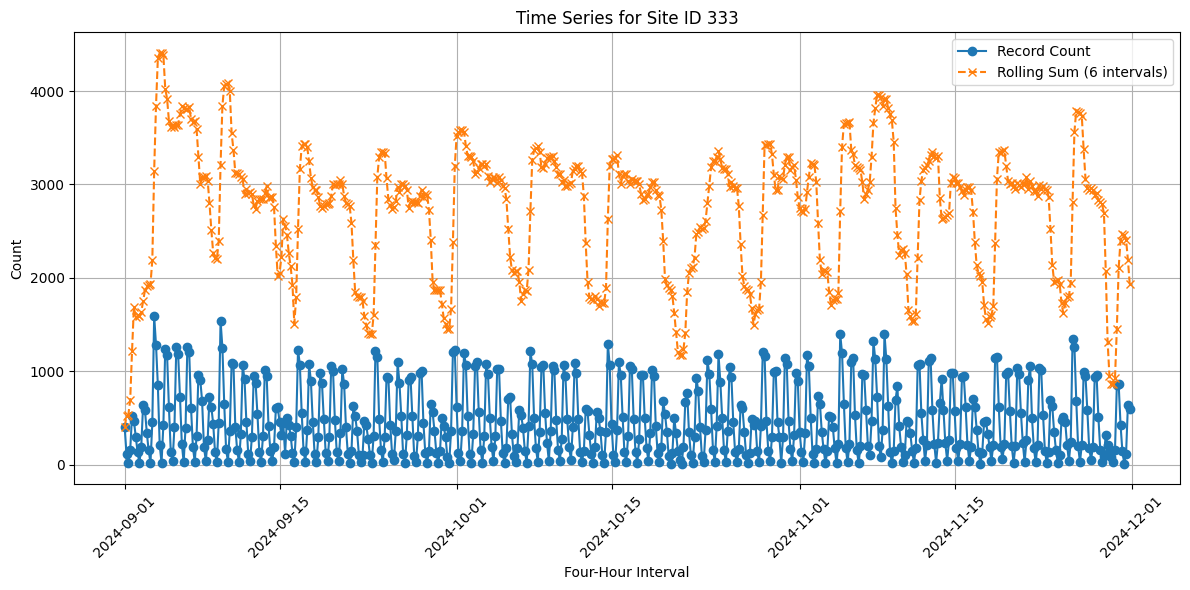

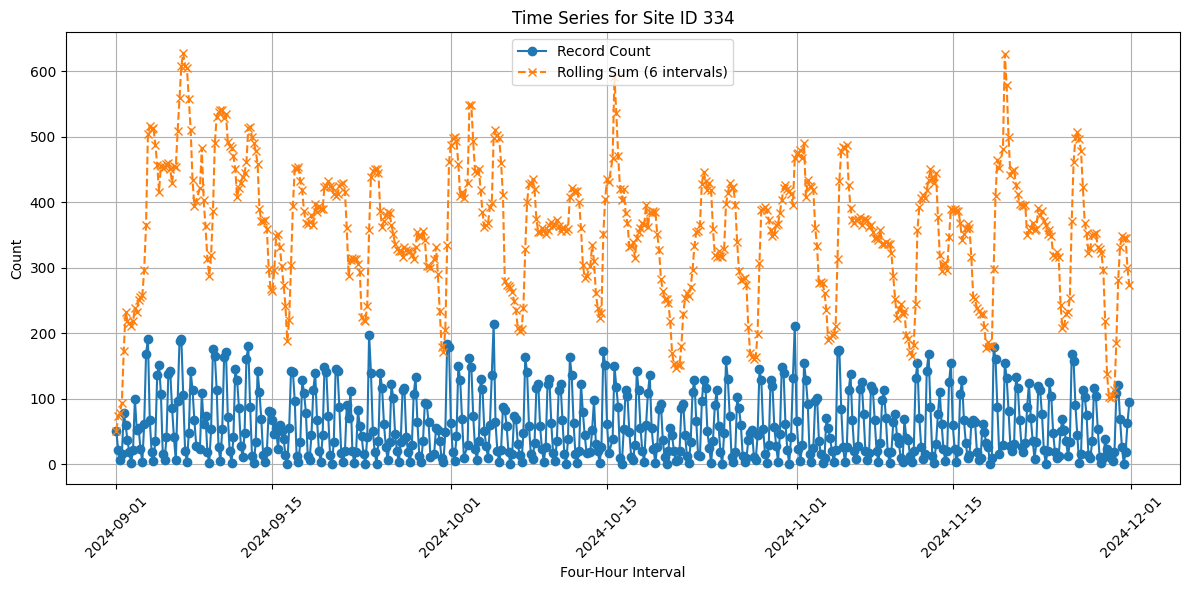

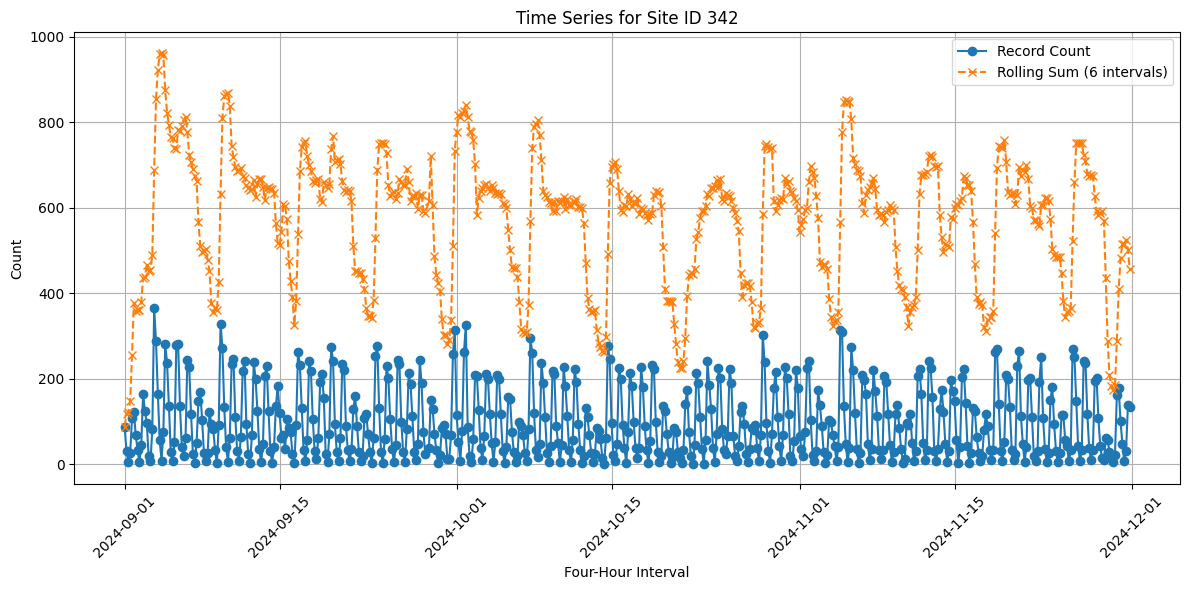

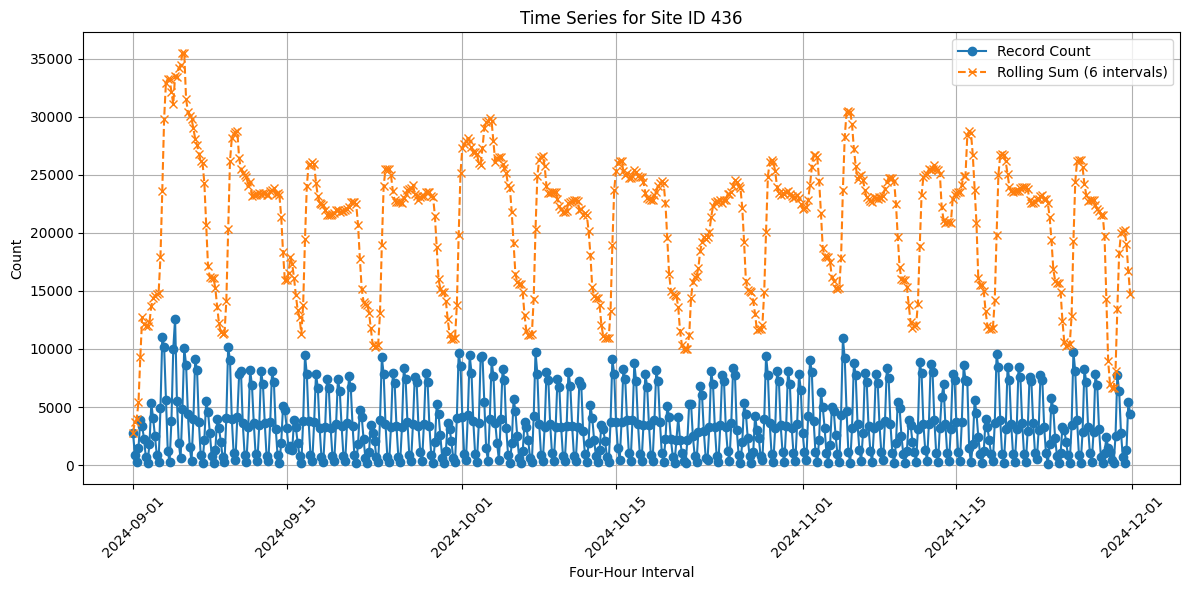

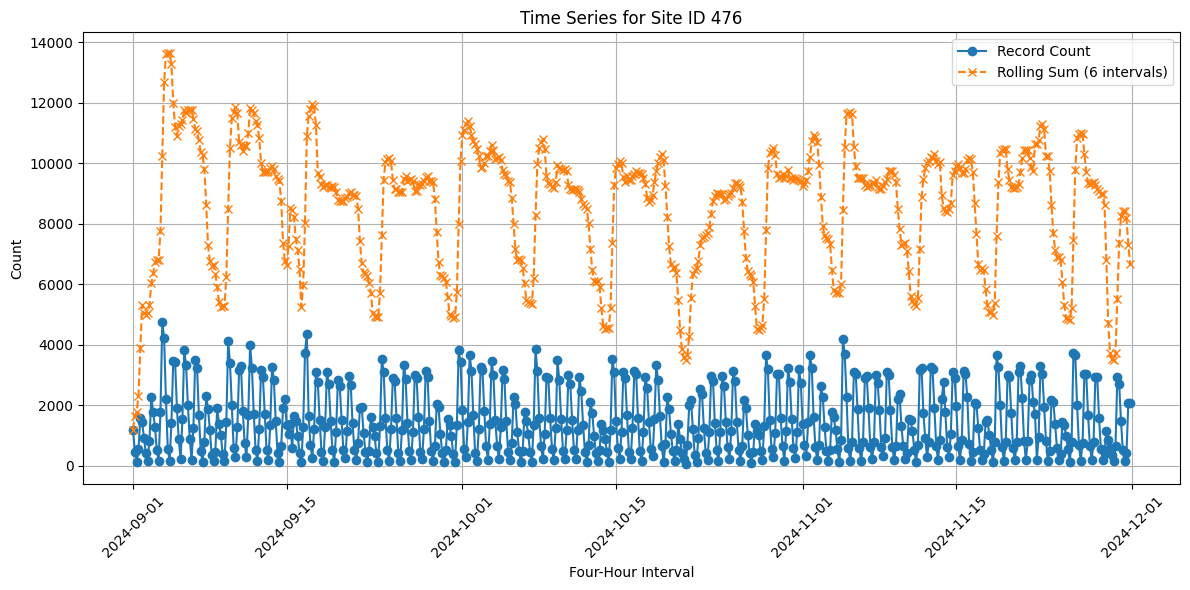

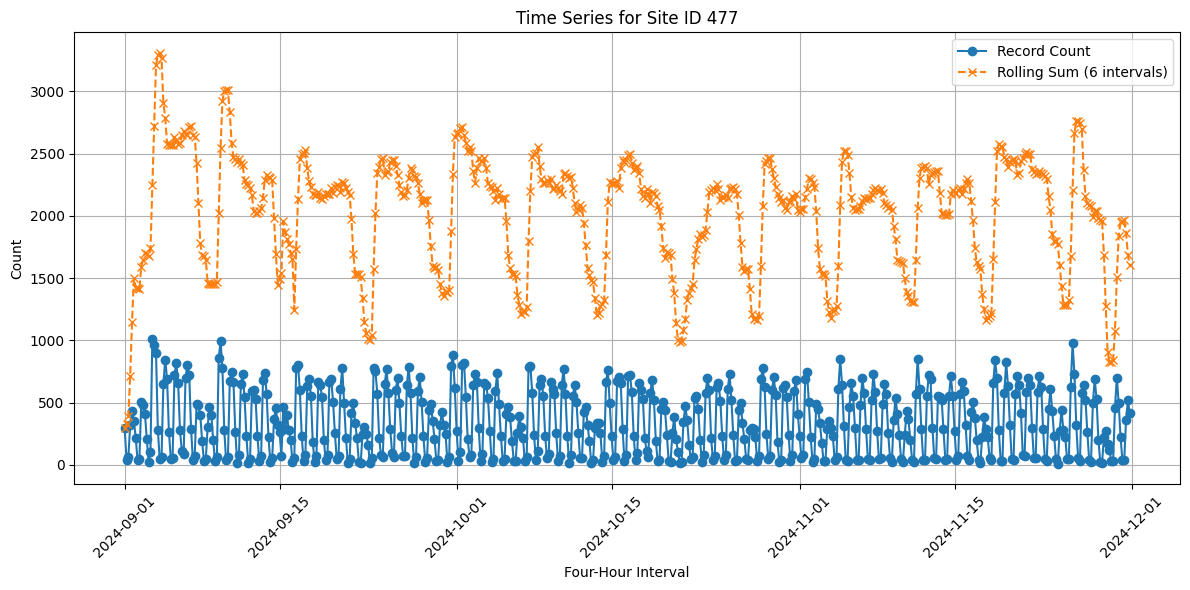

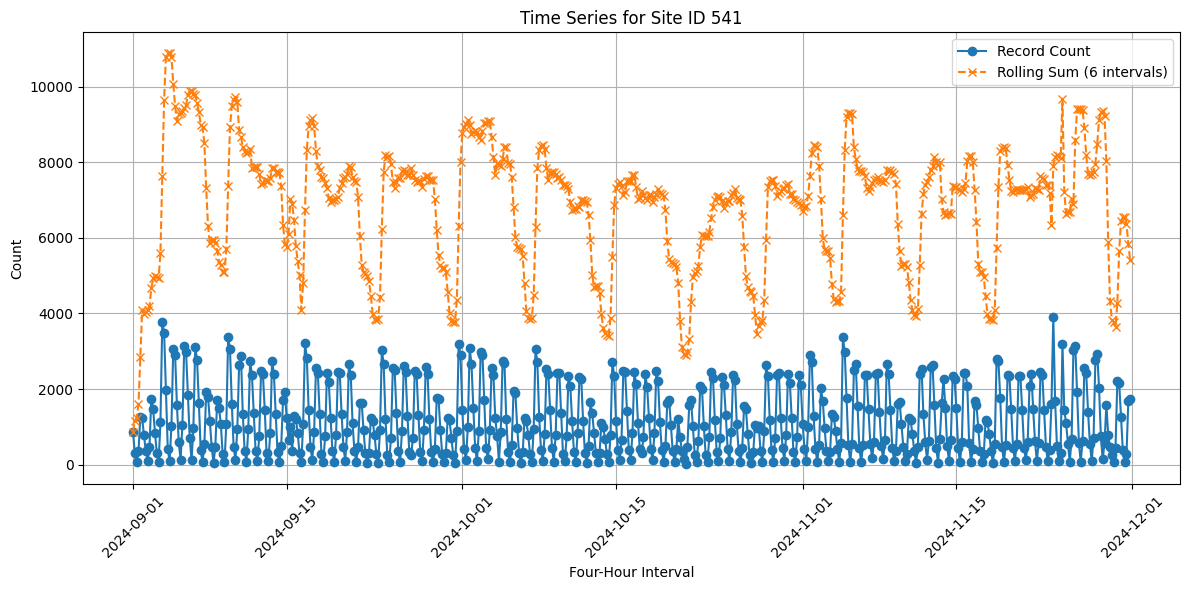

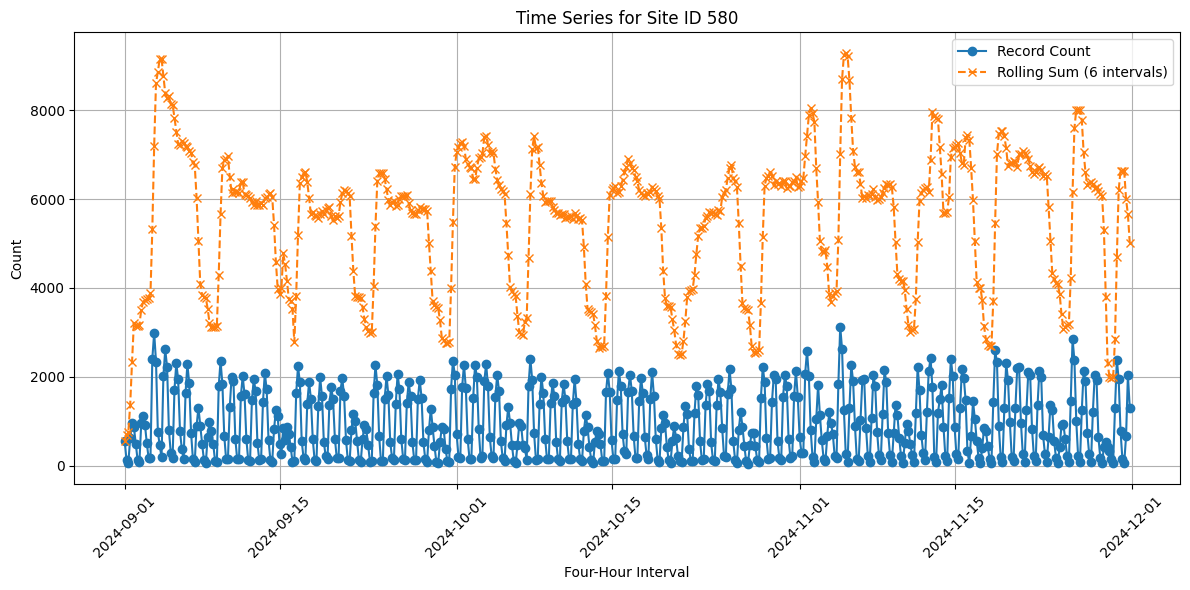

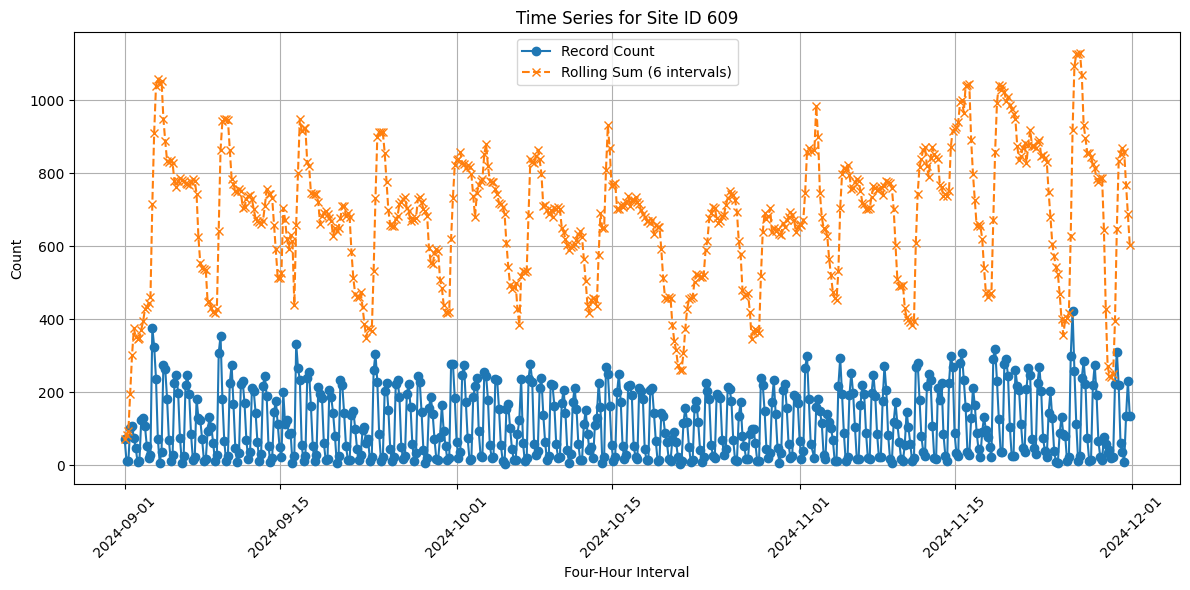

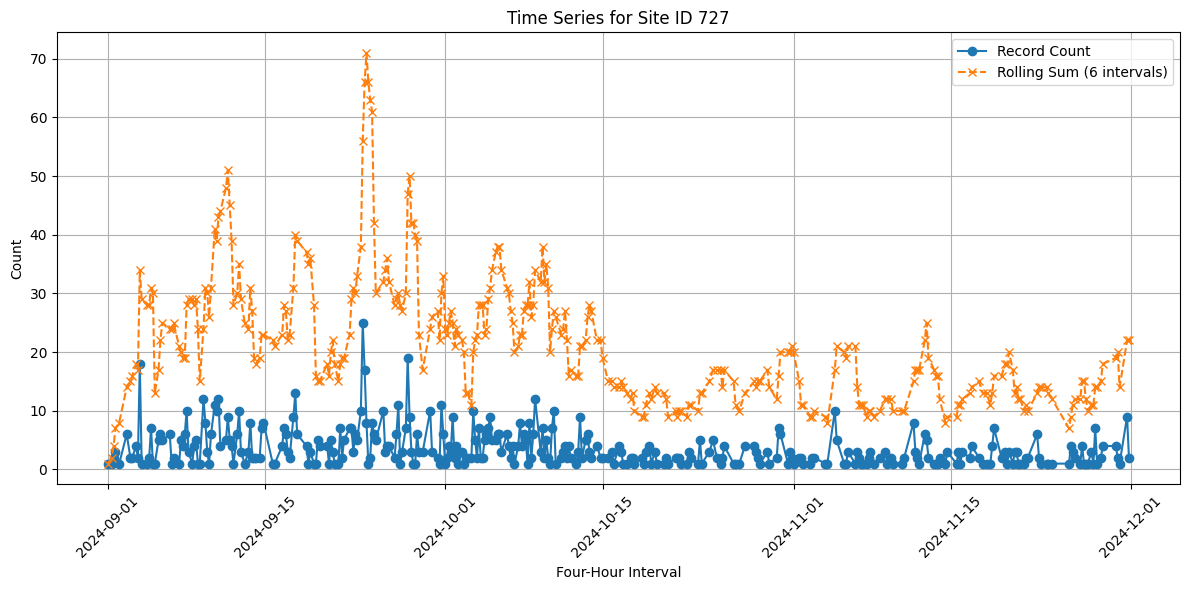

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = r"C:\Users\jebby\Documents\CourseWork\project team\interactions\interactions\1\1\combined_1.csv"

# Read the CSV file
try:
    data = pd.read_csv(file_path)
    # Print the first few rows of the dataset
    print(data.head())
except FileNotFoundError:
    print(f"The file at {file_path} was not found. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")

# Convert 'start_time' to datetime if not already done
data['start_time'] = pd.to_datetime(data['start_time'], errors='coerce')

# Extract the 4-hour interval from 'start_time'
data['four_hour_interval'] = data['start_time'].dt.floor('4H')

# Group by 'four_hour_interval' and 'site_id' and count the number of records
four_hourly_data = data.groupby(['four_hour_interval', 'site_id']).size().reset_index(name='record_count')

# Ensure the data is sorted by 'site_id' and 'four_hour_interval'
four_hourly_data = four_hourly_data.sort_values(by=['site_id', 'four_hour_interval'])

# Get unique site_ids
unique_site_ids = four_hourly_data['site_id'].unique()

# Loop through each site_id and plot the time series
for site_id in unique_site_ids:
    # Filter data for the current site_id
    site_hourly_data = four_hourly_data[four_hourly_data['site_id'] == site_id]

    # Ensure the data is sorted by 'four_hour_interval'
    site_hourly_data = site_hourly_data.sort_values(by='four_hour_interval')

    # Calculate the rolling sum
    site_hourly_data['rolling'] = site_hourly_data['record_count'].rolling(window=6, min_periods=1).sum()

    # Plot the time series for record_count and rolling sum
    plt.figure(figsize=(12, 6))

    # Plot record_count
    plt.plot(site_hourly_data['four_hour_interval'], site_hourly_data['record_count'], label='Record Count', marker='o')

    # Plot rolling sum
    plt.plot(site_hourly_data['four_hour_interval'], site_hourly_data['rolling'], label='Rolling Sum (6 intervals)', linestyle='--', marker='x')

    # Customize the plot
    plt.title(f"Time Series for Site ID {site_id}")
    plt.xlabel('Four-Hour Interval')
    plt.ylabel('Count')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Display the plot
    plt.tight_layout()
    plt.show()


## RNN for site 239

In [7]:
site_hourly_data = four_hourly_data[four_hourly_data['site_id'] == 239]
site_hourly_data.head()

four_hour_interval  site_id  record_count
12 2024-09-01 00:00:00      239           130
34 2024-09-01 04:00:00      239            17
55 2024-09-01 08:00:00      239            25
77 2024-09-01 12:00:00      239           125
99 2024-09-01 16:00:00      239           134

### building the LSTM for site 239

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

# Convert the `four_hour_interval` column to datetime
site_hourly_data['four_hour_interval'] = pd.to_datetime(site_hourly_data['four_hour_interval'])

# Extract the record_count column for model input
data = site_hourly_data['record_count'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Reshape for LSTM input (3D array: [samples, timesteps, features])
timesteps = 3  # Window size
X = []
for i in range(len(data_normalized) - timesteps + 1):
    X.append(data_normalized[i:i + timesteps])
X = np.array(X)

### 2. **Build the LSTM Autoencoder**

# Define the LSTM Autoencoder
model = Sequential([
    LSTM(64, activation='relu', input_shape=(timesteps, 1), return_sequences=True),
    LSTM(32, activation='relu', return_sequences=False),
    RepeatVector(timesteps),
    LSTM(32, activation='relu', return_sequences=True),
    LSTM(64, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
history = model.fit(X, X, epochs=50, batch_size=1, validation_split=0.2, shuffle=False)


C:\Users\jebby\AppData\Local\Temp\ipykernel_11476\2641807432.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  site_hourly_data['four_hour_interval'] = pd.to_datetime(site_hourly_data['four_hour_interval'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 repeat_vector (RepeatVector  (None, 3, 32)            0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 3, 32)             8320      
                                                                 
 lstm_3 (LSTM)               (None, 3, 64)             24832     
                                                                 
 time_distributed (TimeDistr  (None, 3, 1)             65        
 ibuted)                                                

In [9]:
import matplotlib.pyplot as plt

# Extract loss and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the validation loss vs. epoch graph
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='x')
plt.title('Training and Validation Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [10]:
# Predict the reconstructed sequences
X_pred = model.predict(X)

# Calculate reconstruction errors
reconstruction_errors = np.mean((X - X_pred) ** 2, axis=(1, 2))

# Define a threshold for outliers (e.g., 95th percentile of errors)
threshold = np.percentile(reconstruction_errors, 95)

# Flag outliers
outliers = reconstruction_errors > threshold

# Add the results to the original data
site_hourly_data['reconstruction_error'] = np.concatenate([[np.nan] * (timesteps - 1), reconstruction_errors])
site_hourly_data['is_outlier'] = np.concatenate([[np.nan] * (timesteps - 1), outliers])

print(site_hourly_data)


In [11]:
# Plot the data and highlight outliers
plt.figure(figsize=(12, 6))

# Plot the record counts
plt.plot(site_hourly_data['four_hour_interval'], site_hourly_data['record_count'], label='Record Count', marker='o')

# Extract and plot outliers
outlier_points = site_hourly_data.loc[site_hourly_data['is_outlier'] == True]
plt.scatter(outlier_points['four_hour_interval'], outlier_points['record_count'], 
            color='red', label='Outliers', s=100, zorder=5)  # Customize marker size and layering

# Add labels and grid
plt.xlabel('Four Hour Interval')
plt.ylabel('Record Count')
plt.title('Outlier Detection in Time Series Data for 95 percentile')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()
